# Curve di possibilità pluviometrica

Autori: Niccolò Schiavi Cappello, Alessandro Lagrecacolonna, Marco Feltrin

In [7]:
import os
import math
from pandas import *
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import norm
from scipy.stats import genextreme,gumbel_r
from numpy import linspace
from pylab import plot,show,hist,figure,title
import numpy as np
%matplotlib inline

In [34]:
plt.rc('xtick', labelsize=15)                #sono comandi globali per tutto il notebook
plt.rc('ytick', labelsize=15)

In [8]:
data=pd.read_pickle("massimi_bieno")
best_param=pd.read_pickle('best_param')
data

,15 min,30 min,45 min,1 ora,3 ore,6 ore,12 ore,24 ore
anno,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1971.0,10.2,11.8,14.6,19.8,41.4,70.0,88.0,121.0
1972.0,13.2,15.8,16.6,26.6,33.4,35.8,45.0,63.8
1973.0,18.8,19.8,21.6,22.0,24.4,38.6,49.0,71.8
1974.0,10.4,14.6,17.6,NaN,NaN,NaN,NaN,NaN
1975.0,17.0,23.2,NaN,26.4,29.8,33.4,50.2,90.5
1976.0,NaN,41.6,NaN,45.6,48.6,50.4,75.2,127.2
1977.0,18.0,19.2,26.0,27.0,32.4,45.0,60.4,67.6
1978.0,18.4,18.6,18.8,20.2,25.8,43.4,71.0,107.0


In [9]:
data_sub=pd.DataFrame(columns=(), index=(data.index)) 
data_sub['15 min']=data['15 min']
data_sub['30 min']=data['30 min']
data_sub['45 min']=data['45 min']
data_sub

#crea un dataframe con i dati dei massimi delle precipitazioni sub-orarie

,15 min,30 min,45 min
anno,,,
NaN,NaN,NaN,NaN
1971.0,10.2,11.8,14.6
1972.0,13.2,15.8,16.6
1973.0,18.8,19.8,21.6
1974.0,10.4,14.6,17.6
1975.0,17.0,23.2,NaN
1976.0,NaN,41.6,NaN
1977.0,18.0,19.2,26.0
1978.0,18.4,18.6,18.8


In [10]:
best_sub=pd.DataFrame(columns=(), index=(best_param.index)) 
best_sub['15 min']=best_param['15 min']
best_sub['30 min']=best_param['30 min']
best_sub['45 min']=best_param['45 min']
best_sub

#crea un dataframe con i parametri migliori per la distribuzione di Gumbel per i dati sub-orari

,15 min,30 min,45 min
a,11.663214,14.491668,16.811388
b,4.466666,5.385548,5.027258


In [11]:
data_or=data_sub=pd.DataFrame(columns=(), index=(data.index)) 
data_or['1 ora']=data['1 ora']
data_or['3 ore']=data['3 ore']
data_or['6 ore']=data['6 ore']
data_or['12 ore']=data['12 ore']
data_or['24 ore']=data['24 ore']
data_or

#crea un dataframe con i valori orari dei massimi delle precipitazioni

,1 ora,3 ore,6 ore,12 ore,24 ore
anno,,,,,
NaN,NaN,NaN,NaN,NaN,NaN
1971.0,19.8,41.4,70.0,88.0,121.0
1972.0,26.6,33.4,35.8,45.0,63.8
1973.0,22.0,24.4,38.6,49.0,71.8
1974.0,NaN,NaN,NaN,NaN,NaN
1975.0,26.4,29.8,33.4,50.2,90.5
1976.0,45.6,48.6,50.4,75.2,127.2
1977.0,27.0,32.4,45.0,60.4,67.6
1978.0,20.2,25.8,43.4,71.0,107.0


In [12]:
best_or=pd.DataFrame(columns=(), index=(best_param.index)) 
best_or['1 ora']=best_param['1 ora']
best_or['3 ore']=best_param['3 ore']
best_or['6 ore']=best_param['6 ore']
best_or['12 ore']=best_param['12 ore']
best_or['24 ore']=best_param['24 ore']
best_or

#crea un dataframe con i parametri migliori associati alle precipitazioni orarie

,1 ora,3 ore,6 ore,12 ore,24 ore
a,19.110965,29.629658,39.539450,53.206385,74.212278
b,6.491387,5.699094,6.408727,11.844914,18.848570


In [13]:
def qtls(df,qu):                                     
    rv1h=gumbel_r(loc=df["a"],scale=df["b"])
    return rv1h.ppf(qu)

#La funzione quantili inverte la curva di Gumbel: prende in input un quantile e la durata associata alla una curva di Gumbel 

In [14]:
Tr=10                                                   #definisce il tempo di ritorno, si usano 10,20,50,100 anni come tempo di ritorno
q10=1-1/Tr                                              #i quantili possono essere scritti in funzione del tempo di ritorno                            
q20=1-1/(2*Tr) 
q50=1-1/(5*Tr)
q100=1-1/(10*Tr)


pts_sub=DataFrame([[qtls(best_sub["15 min"],q10),
           qtls(best_sub["30 min"],q10),
           qtls(best_sub["45 min"],q10)],
          [qtls(best_sub["15 min"],q20),
           qtls(best_sub["30 min"],q20),
           qtls(best_sub["45 min"],q20)],
          [qtls(best_sub["15 min"],q50),
           qtls(best_sub["30 min"],q50),
           qtls(best_sub["45 min"],q50)],
          [qtls(best_sub["15 min"],q100),
           qtls(best_sub["30 min"],q100),
           qtls(best_sub["45 min"],q100),]], index=[10,20,50,100],columns=[0.25,0.5,0.75]).T
pts_sub     

#crea un dataframe con le altezze di pioggia associata ad una durata e ad un tempo di ritorno

,10,20,50,100
0.25,21.714854,24.930085,29.091871,32.210545
0.50,26.611128,30.487795,35.505744,39.265990
0.75,28.124564,31.743325,36.427439,39.937523


In [15]:
pts_or=DataFrame([[qtls(best_or["1 ora"],q10),
           qtls(best_or["3 ore"],q10),
           qtls(best_or["6 ore"],q10),
           qtls(best_or["12 ore"],q10),
           qtls(best_or["24 ore"],q10)],
          [qtls(best_or["1 ora"],q20),
           qtls(best_or["3 ore"],q20),
           qtls(best_or["6 ore"],q20),
           qtls(best_or["12 ore"],q20),
           qtls(best_or["24 ore"],q20)],
          [qtls(best_or["1 ora"],q50),
           qtls(best_or["3 ore"],q50),
           qtls(best_or["6 ore"],q50),
           qtls(best_or["12 ore"],q50),
           qtls(best_or["24 ore"],q50)],
          [qtls(best_or["1 ora"],q100),
           qtls(best_or["3 ore"],q100),
           qtls(best_or["6 ore"],q100),
           qtls(best_or["12 ore"],q100),
           qtls(best_or["24 ore"],q100)]], index=[10,20,50,100],columns=[1,3,6,12,24]).T
pts_or      

#stessa operazione del dataframe soprastante ma utilizzando i dati orari

,10,20,50,100
1,33.718969,38.391650,44.439957,48.972312
3,42.454713,46.557079,51.867173,55.846340
6,53.961440,58.574621,64.545910,69.020551
12,79.861793,88.388093,99.424514,107.694758
24,116.628483,130.196210,147.758241,160.918511


In [35]:
def plotCPP(CPP,xrange,yrange,titolo):
    ag=CPP.T.plot(style="o")
    plt.xlim(xrange)
    plt.ylim(yrange)
    agl=CPP.T.plot(style="o-")
    agl.set_yscale('log')
    agl.set_xscale('log')
    plt.xlim(xrange)
    plt.ylim(yrange)
    ag.set_xlabel('durata [ore]')
    ag.set_ylabel('altezza [mm]')
    ag.set_title(titolo)
    agl.set_xlabel('durata [ore]')
    agl.set_ylabel('altezza [mm]')
    agl.set_title(titolo)
    
    
#funzione che prende in input i dati dei dataframe soprastanti e li plotta con scala normale e logaritmica
#prende in input anche dei vettori che permettono di scegliere il range di valori da plottare e una stringa per definire il titolo

D:\Anaconda\envs\geoframe_verona\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  


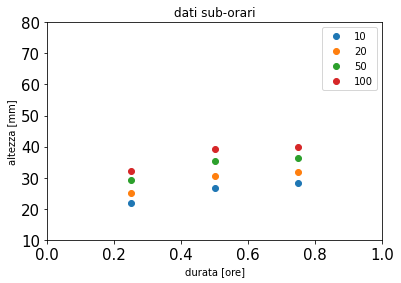

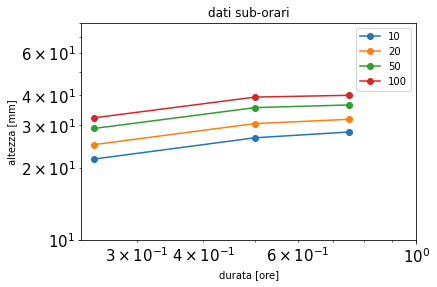

In [36]:
plotCPP(pts_sub.T,[0,1],[10,80],'dati sub-orari')

D:\Anaconda\envs\geoframe_verona\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  


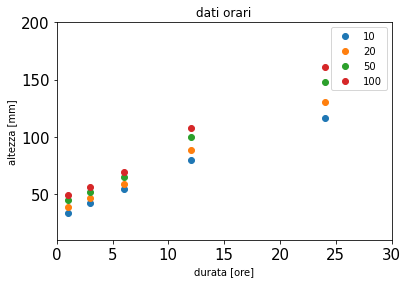

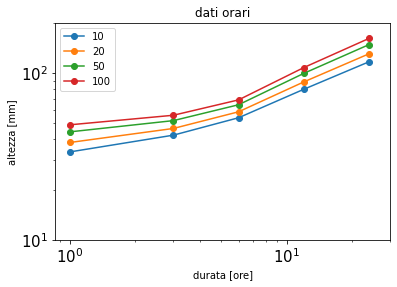

In [37]:
plotCPP(pts_or.T,[0,30],[10,200],'dati orari')

## Determinazione dei parametri n ed a delle curve di possibilità pluviometrica

In [20]:
def a_n (pts):
    fnl=DataFrame(index=['n','a'],columns=[10,20,50,100])
    for i in pts.columns:
        ini=np.polyfit(np.log(pts[i].index),np.log(pts[i]),1)
        ini[1]=np.exp(ini[1])
        fnl[i]=ini
    fnl1=fnl.T
    fnl1.index=[10,20,50,100]
    return fnl1
    
#prende in input i punti teoricamente appartenenti ad una curva di possibilità pluviometrica e restituisce a ed n per ogni tempo di ritorno

In [21]:
sub=a_n(pts_sub)
sub

,n,a
10,0.241667,30.651301
20,0.227504,34.577546
50,0.213591,39.660562
100,0.205416,43.470011


In [23]:
orarie=a_n(pts_or)
orarie

,n,a
10,0.393654,30.126399
20,0.388408,33.699526
50,0.383172,38.304050
100,0.380057,41.743394


In [25]:
def h(tp,a,n):
        return a*tp**n                                                   #definisce l'espressione delle curve di possibilità pluviometrica

def d(Tr,an,start):
    tp=np.linspace(start,30,500)                                          #500 durate prese tra start e 30 ore
    inh=DataFrame(index=tp)
    for i in Tr:
        hi=h(tp,an["a"][i],an["n"][i])
        inh[i]=hi
    inh.columns=['Tr=10','Tr=20','Tr=50','Tr=100']
    return inh
    
#funzione che prende in input un vettore coi tempi di ritorno, il dataframe contenente a e n e un punto start da cui si iniziano a prendere i punti
#restituisce un dataframe con le altezze associate a tp e tr per i 500 punti tra start e 30 ore

In [26]:
inh_sub=d([10,20,50,100],sub,0.1)
inh_sub

,Tr=10,Tr=20,Tr=50,Tr=100
0.100000,17.570406,20.478139,24.253134,27.087804
0.159920,19.681504,22.786573,26.811405,29.830367
0.219840,21.254827,24.497450,28.697142,31.845483
0.279760,22.529679,25.878297,30.213226,33.461895
0.339679,23.611509,27.046475,31.491943,34.822815
...,...,...,...,...
29.760321,69.595099,74.825936,81.868075,87.276725
29.820240,69.628936,74.860184,81.903255,87.312792
29.880160,69.662722,74.894379,81.938378,87.348802
29.940080,69.696457,74.928521,81.973447,87.384755


In [27]:
inh_or=d([10,20,50,100],orarie,0.7)
inh_or

,Tr=10,Tr=20,Tr=50,Tr=100
0.700000,26.179992,29.339901,33.411084,36.451562
0.758717,27.023420,30.272337,34.458368,37.584719
0.817435,27.828135,31.161611,35.456770,38.664727
0.876152,28.598515,32.012623,36.411854,39.697643
0.934870,29.338189,32.829426,37.328224,40.688483
...,...,...,...,...
29.765130,114.571767,125.899355,140.581659,151.593700
29.823848,114.660685,125.995762,140.687857,151.707285
29.882565,114.749498,126.092053,140.793927,151.820733
29.941283,114.838204,126.188229,140.899868,151.934042


In [38]:
def plot_cpp(data,titolo):
    a=data.plot()
    a.set_xlabel('Durata [ore]')
    a.set_ylabel('Altezza [mm]')
    a.set_title(titolo)
    b=data.plot()
    b.set_xscale('log')
    b.set_yscale('log')
    b.set_xlabel('Durata [ore]')
    b.set_ylabel('Altezza [mm]')
    b.set_title(titolo)
    
#funzione che plotta le curve di possibilità pluviometrica su diagramma normale e bilogaritmico

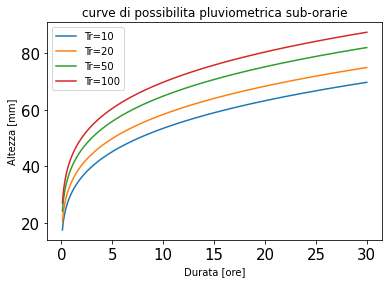

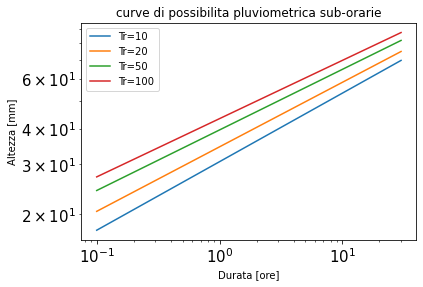

In [39]:
plot_cpp(inh_sub,'curve di possibilita pluviometrica sub-orarie')

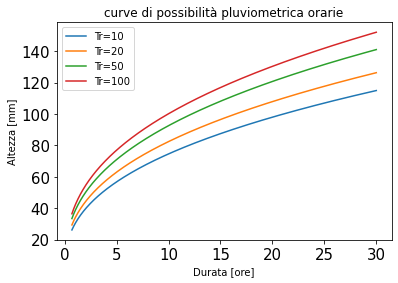

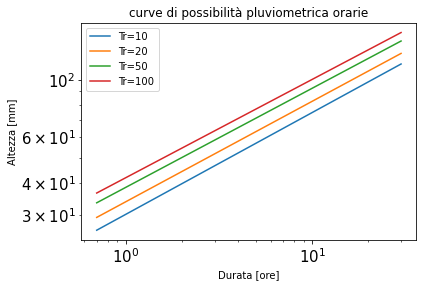

In [40]:
plot_cpp(inh_or,'curve di possibilità pluviometrica orarie')

In [41]:
def plot_sovr(inh,pts,xlim,titolo):
    ag=inh.plot()
    ag.set_xlim(xlim)
    ag.set_title(titolo)
    ag.set_xlabel('Durata [ore]')
    ag.set_ylabel('Altezza [mm]')
    ag=plot(pts[10],"o",color="blue")
    ag=plot(pts[20],"o",color="orange")
    ag=plot(pts[50], "o",color="green")
    ag=plot(pts[100],"o",color="red")
    
#funzione che sovrappone i dati puntuali alle curve di possibilità pluviometrica

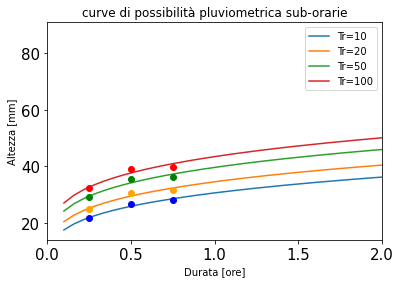

In [42]:
plot_sovr(inh_sub,pts_sub,[0,2],'curve di possibilità pluviometrica sub-orarie')

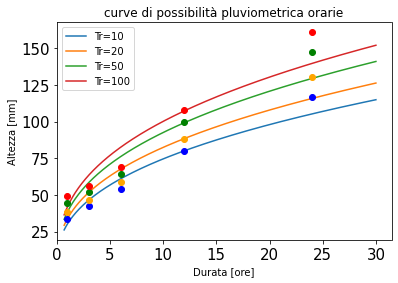

In [43]:
plot_sovr(inh_or,pts_or,0,'curve di possibilità pluviometrica orarie')

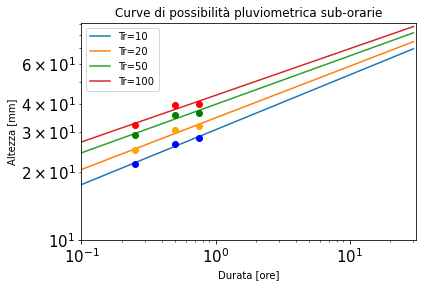

In [44]:
b=inh_sub.plot()
b.set_xlim(0.1)
b.set_ylim(10)
b.set_xscale('log')
b.set_yscale('log')
b.set_xlabel('Durata [ore]')
b.set_ylabel('Altezza [mm]')
b.set_title('Curve di possibilità pluviometrica sub-orarie')
b=plot(pts_sub[10],"o",color="blue")
b=plot(pts_sub[20],"o",color="orange")
b=plot(pts_sub[50], "o",color="green")
b=plot(pts_sub[100],"o",color="red")

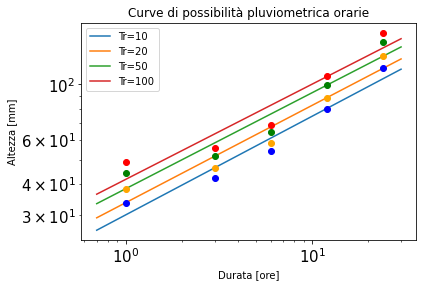

In [45]:
b=inh_or.plot()
b.set_xscale('log')
b.set_yscale('log')
b.set_xlabel('Durata [ore]')
b.set_ylabel('Altezza [mm]')
b.set_title('Curve di possibilità pluviometrica orarie')
b=plot(pts_or[10],"o",color="blue")
b=plot(pts_or[20],"o",color="orange")
b=plot(pts_or[50], "o",color="green")
b=plot(pts_or[100],"o",color="red")